In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("Worksheet.csv")

In [ ]:
df.head()

In [92]:
df.shape

(16383, 59)

In [ ]:
####################### CONVERTING DATATYPES TO APPROPRIATE TYPES #######################

In [19]:
df['Value_of_Property'] = df['Value_of_Property'].str.replace(',', '').astype(float)
df['Value_of_Property'] = df['Value_of_Property'].astype(int)
df['APR']= df['APR'].astype(int)
df['Net_Advance']= df['Net_Advance'].astype(int)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 59 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Ref                                              16383 non-null  int64  
 1   Credit_Score                                     16383 non-null  int64  
 2   Final_Grade                                      16383 non-null  object 
 3   Term                                             16383 non-null  int64  
 4   Net_Advance                                      16383 non-null  int32  
 5   APR                                              16383 non-null  int32  
 6   Loan_Type                                        16383 non-null  object 
 7   Mosaic                                           16383 non-null  int64  
 8   Mosaic_Class                                     16383 non-null  int64  
 9   Time_at_Address             

In [98]:
#Notes on data quality
#1) Column names are incomplete
#2) Assumptions have been made on what each variable means
#3) There are no NA values
#4) data type of Value of property is incorrect
#5) age column has -ve values for ref id (12462,13252,29544)
#6) no of accounts also have -ve values

In [99]:
# all variables can be categorized into 
# > Card Attributes
# > Loan Attributes
# > User Attributes
# > Mortgage Attributes
# > User Payment Potential
# > Policy Description

In [ ]:
####################### LOGISTIC REGRESSION FOR FEATURE IMPORTANCE #######################

In [29]:
features = [
"Final_Grade",
"Loan_Type",
"Residential_Status",
"Telephone_Indicator",
"Number_of_Dependants",
"Marital_Status",
"Gender",
"Employment_Status",
"Full_Part_Time_Empl_Ind",
"Perm_Temp_Empl_Ind",
"ACCESS_Card",
"VISA_Card",
"American_Express",
"Diners_Card",
"Cheque_Guarantee",
"Other_Credit_Store_Card",
"Payment_Method",
"Bankruptcy_Detected__SP_",
"CIFAS_detected",
"Current_Account"
]
dummies = pd.get_dummies(df[features])

In [31]:
df1 = df.drop(df[features],axis=1)
df1 = df1.drop(["Ref","Insurance_Description","code","prdt_desc","category","PPI_SINGLE","PPI_JOINT","PPI_LCI","PPI"],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Credit_Score                                     16383 non-null  int64
 1   Term                                             16383 non-null  int64
 2   Net_Advance                                      16383 non-null  int32
 3   APR                                              16383 non-null  int32
 4   Mosaic                                           16383 non-null  int64
 5   Mosaic_Class                                     16383 non-null  int64
 6   Time_at_Address                                  16383 non-null  int64
 7   Time_in_Employment                               16383 non-null  int64
 8   Income_Range                                     16383 non-null  int64
 9   Time_with_Bank                                   1

In [33]:
# combining encoded and numerical variables to create a dataframe
X = pd.concat([df1,dummies],axis=1)
y = df['PPI']

In [38]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter = 4000)
logmodel.fit(X,y)

LogisticRegression(max_iter=4000)

In [52]:
from sklearn import metrics
y_pred =  logmodel.predict(X)
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.6495757797717145


Feature: 0, Score: -0.00148
Feature: 1, Score: 0.02128
Feature: 2, Score: -0.00004
Feature: 3, Score: 0.00673
Feature: 4, Score: 0.01268
Feature: 5, Score: 0.00197
Feature: 6, Score: 0.00156
Feature: 7, Score: -0.00029
Feature: 8, Score: 0.00117
Feature: 9, Score: 0.00110
Feature: 10, Score: -0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: -0.00000
Feature: 13, Score: -0.00005
Feature: 14, Score: 0.00002
Feature: 15, Score: 0.00735
Feature: 16, Score: -0.00007
Feature: 17, Score: 0.00031
Feature: 18, Score: 0.00231
Feature: 19, Score: -0.00155
Feature: 20, Score: 0.00072
Feature: 21, Score: 0.00063
Feature: 22, Score: 0.00048
Feature: 23, Score: 0.00034
Feature: 24, Score: 0.00082
Feature: 25, Score: 0.00004
Feature: 26, Score: 0.00024
Feature: 27, Score: -0.00007
Feature: 28, Score: -0.00043
Feature: 29, Score: 0.00029
Feature: 30, Score: -0.00003
Feature: 31, Score: 0.00006
Feature: 32, Score: 0.00013
Feature: 33, Score: 0.00008
Feature: 34, Score: 0.00009
Feature: 35, Score

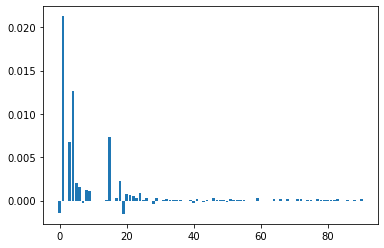

In [42]:
from matplotlib import pyplot
importance = logmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 91 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Credit_Score                                     16383 non-null  int64
 1   Term                                             16383 non-null  int64
 2   Net_Advance                                      16383 non-null  int32
 3   APR                                              16383 non-null  int32
 4   Mosaic                                           16383 non-null  int64
 5   Mosaic_Class                                     16383 non-null  int64
 6   Time_at_Address                                  16383 non-null  int64
 7   Time_in_Employment                               16383 non-null  int64
 8   Income_Range                                     16383 non-null  int64
 9   Time_with_Bank                                   1

In [47]:
c.to_csv('corelation_metrix.csv', header=True, index=False)
c

,Credit_Score,Term,Net_Advance,APR,Mosaic,Mosaic_Class,Time_at_Address,Time_in_Employment,Income_Range,Time_with_Bank,...,Payment_Method_D,Payment_Method_S,Bankruptcy_Detected__SP__N,Bankruptcy_Detected__SP__T,Bankruptcy_Detected__SP__Y,CIFAS_detected_N,CIFAS_detected_T,CIFAS_detected_Y,Current_Account_FALS,Current_Account_TRUE
Credit_Score,1.000000,0.027229,0.200175,-0.675303,-0.083799,-0.039007,0.270914,0.294277,0.047819,0.368563,...,0.019227,-0.014940,0.005476,0.024664,-0.020569,0.005155,0.024664,-0.013071,-0.011947,0.011947
Term,0.027229,1.000000,0.721736,-0.386528,0.041727,0.013228,-0.004591,0.037290,0.191210,0.074812,...,0.021708,0.003877,-0.001006,-0.027138,0.016838,-0.007970,-0.027138,0.016788,-0.030022,0.030022
Net_Advance,0.200175,0.721736,1.000000,-0.504622,-0.047204,-0.030183,0.022056,0.097756,0.238650,0.130463,...,0.023598,-0.002610,-0.003512,-0.003167,0.005883,-0.012939,-0.003167,0.014530,-0.022012,0.022012
APR,-0.675303,-0.386528,-0.504622,1.000000,0.049285,0.024153,-0.151738,-0.237711,-0.261744,-0.306087,...,-0.019545,0.011253,-0.019835,0.011057,0.016511,-0.012821,0.011057,0.009981,0.019548,-0.019548
Mosaic,-0.083799,0.041727,-0.047204,0.049285,1.000000,0.695923,0.116184,0.001578,-0.028263,0.029244,...,0.003055,0.016314,0.008305,-0.038895,0.012880,0.021428,-0.038895,-0.010328,-0.026249,0.026249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CIFAS_detected_N,0.005155,-0.007970,-0.012939,-0.012821,0.021428,0.014583,0.021560,0.008351,-0.011224,0.002320,...,-0.005068,0.002409,0.145502,-0.295747,0.002863,1.000000,-0.295747,-0.954799,0.003306,-0.003306
CIFAS_detected_T,0.024664,-0.027138,-0.003167,0.011057,-0.038895,-0.018754,0.000433,0.010903,-0.040181,0.005495,...,0.001499,-0.000712,-0.499633,1.000000,-0.000847,-0.295747,1.000000,-0.001577,-0.000978,0.000978
CIFAS_detected_Y,-0.013071,0.016788,0.014530,0.009981,-0.010328,-0.009431,-0.022704,-0.012134,0.024253,-0.004139,...,0.004839,-0.002300,0.003157,-0.001577,-0.002733,-0.954799,-0.001577,1.000000,-0.003157,0.003157
Current_Account_FALS,-0.011947,-0.030022,-0.022012,0.019548,-0.026249,-0.013551,0.037824,0.003910,-0.052255,-0.080305,...,-0.652338,-0.001426,0.001957,-0.000978,-0.001694,0.003306,-0.000978,-0.003157,1.000000,-1.000000


<AxesSubplot:>

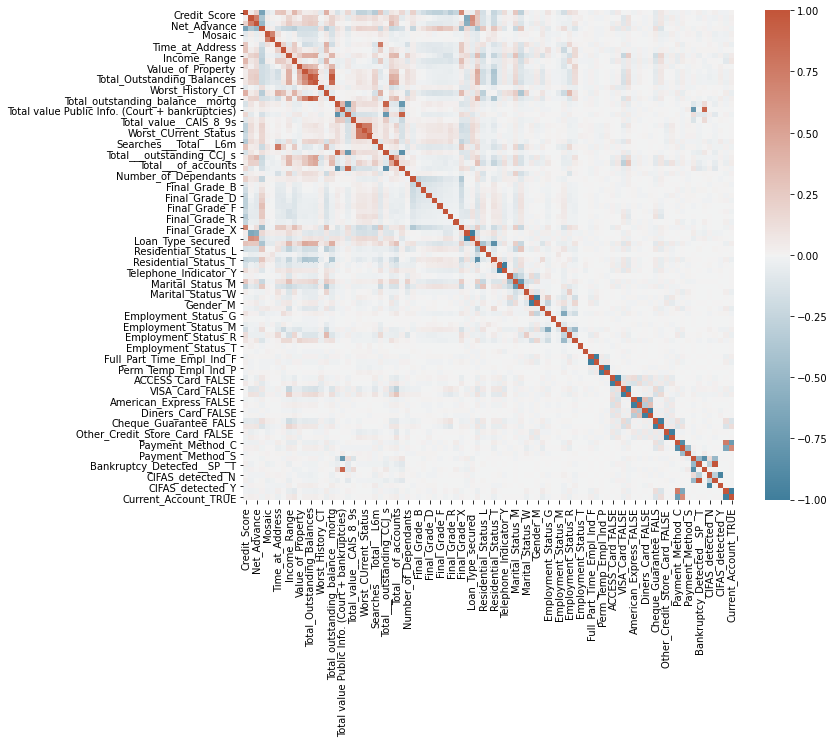

In [45]:
c = X.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(c,cmap=cmap)

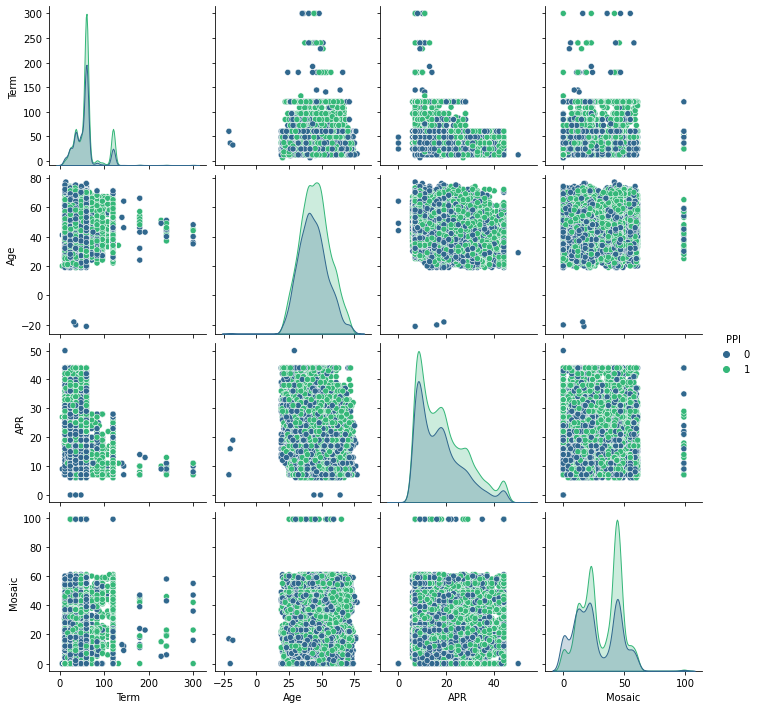

In [44]:
# pairwise plot for important variables

df1 = df[["PPI", "Term", "Age", "APR", "Mosaic"]]
sns.pairplot(df1, hue = 'PPI', palette='viridis')

<AxesSubplot:xlabel='Bankruptcy_Detected__SP_', ylabel='count'>

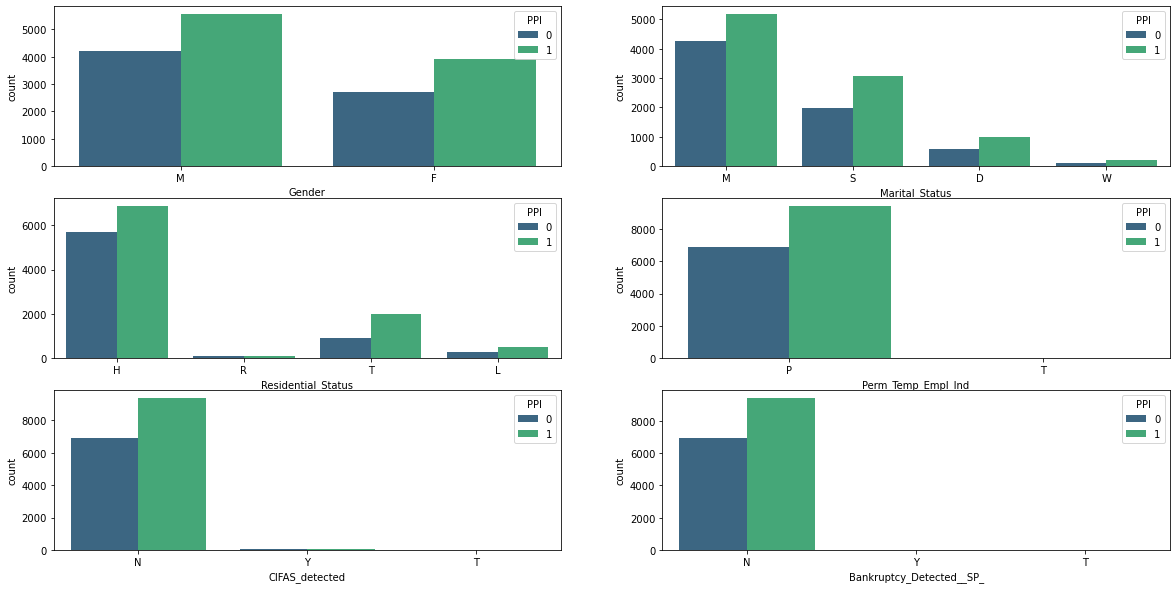

In [147]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.countplot(x = 'Gender', hue = 'PPI', data = df, palette='viridis')
plt.subplot(322)
sns.countplot(x = 'Marital_Status', hue = 'PPI', data = df, palette='viridis')
plt.subplot(323)
sns.countplot(x = 'Residential_Status', hue = 'PPI', data = df, palette='viridis')
plt.subplot(324)
sns.countplot(x = 'Perm_Temp_Empl_Ind', hue = 'PPI', data = df, palette='viridis')
plt.subplot(325)
sns.countplot(x = 'CIFAS_detected', hue = 'PPI', data = df, palette='viridis')
plt.subplot(326)
sns.countplot(x = 'Bankruptcy_Detected__SP_', hue = 'PPI', data = df, palette='viridis')

<AxesSubplot:xlabel='Worst_History_CT', ylabel='Density'>

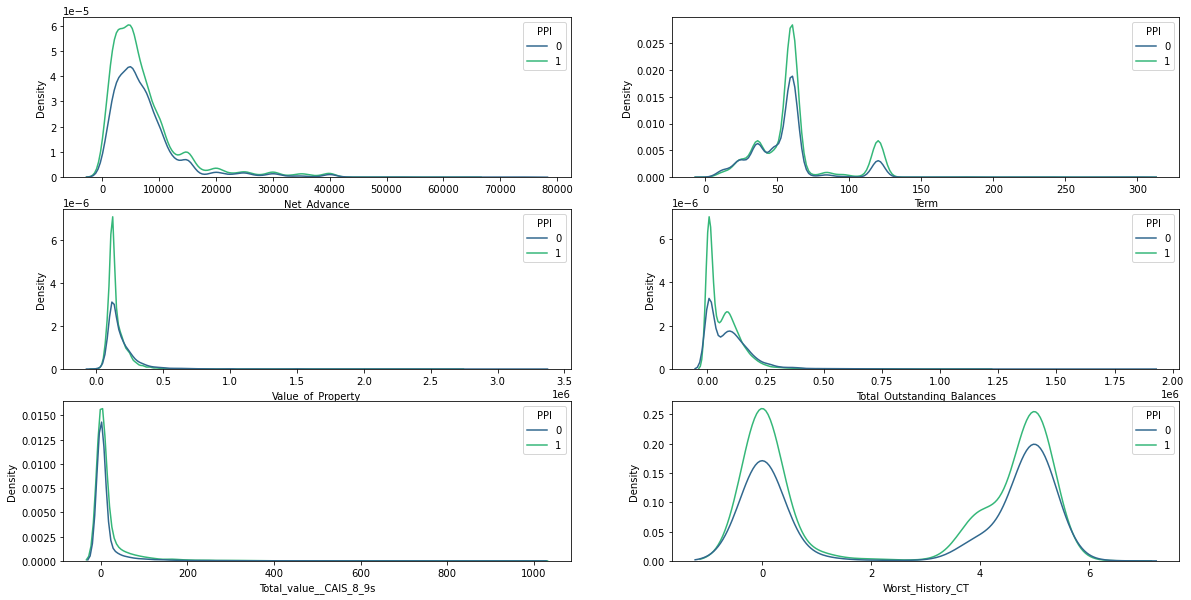

In [144]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.kdeplot(x = 'Net_Advance', hue = 'PPI', data = df, palette='viridis')
plt.subplot(322)
sns.kdeplot(x = 'Term', hue = 'PPI', data = df, palette='viridis')
plt.subplot(323)
sns.kdeplot(x = 'Value_of_Property', hue = 'PPI', data = df, palette='viridis')
plt.subplot(324)
sns.kdeplot(x = 'Total_Outstanding_Balances', hue = 'PPI', data = df, palette='viridis')
plt.subplot(325)
sns.kdeplot(x = 'Total_value__CAIS_8_9s', hue = 'PPI', data = df, palette='viridis')
plt.subplot(326)
sns.kdeplot(x = 'Worst_History_CT', hue = 'PPI', data = df, palette='viridis')

<AxesSubplot:xlabel='Number_of_Dependants', ylabel='Density'>

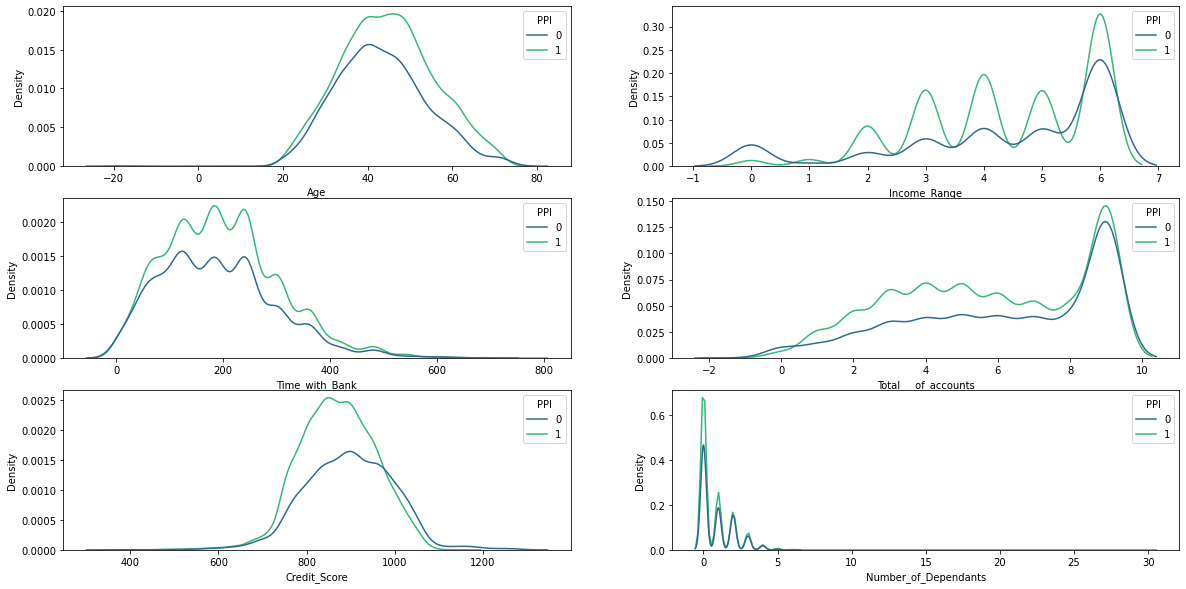

In [146]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.kdeplot(x = 'Age', hue = 'PPI', data = df, palette='viridis')
plt.subplot(322)
sns.kdeplot(x = 'Income_Range', hue = 'PPI', data = df, palette='viridis')
plt.subplot(323)
sns.kdeplot(x = 'Time_with_Bank', hue = 'PPI', data = df, palette='viridis')
plt.subplot(324)
sns.kdeplot(x = 'Total___of_accounts', hue = 'PPI', data = df, palette='viridis')
plt.subplot(325)
sns.kdeplot(x = 'Credit_Score', hue = 'PPI', data = df, palette='viridis')
plt.subplot(326)
sns.kdeplot(x = 'Number_of_Dependants', hue = 'PPI', data = df, palette='viridis')

In [ ]:
####################### CLUSTERING WITH IMPORTANT FEATURES #######################

In [62]:
from sklearn.cluster import KMeans
imp = ["Term",
"Mosaic",
"Age",
"APR",
"Total # Public Info. (Court + bankruptcies)",
"Mosaic_Class",
"Time_at_Address",
"Income_Range",
"Time_with_Bank",
"Credit_Score",
"Total value Public Info. (Court + bankruptcies)"]
x_imp = X[imp]
y_imp = y

Text(0, 0.5, 'WCSS')

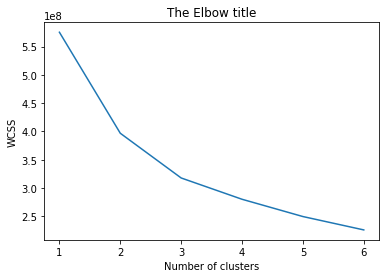

In [64]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x_imp)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
##optimal number of clusters = 3

In [69]:
Kmeans_imp = KMeans(n_clusters=3)
k_model = Kmeans_imp.fit(x_imp)
x_imp['clusters'] = k_model.fit_predict(x_imp)

<ipython-input-69-6f2d317248c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_imp['clusters'] = k_model.fit_predict(x_imp)


In [71]:
x_imp.head()

,Term,Mosaic,Age,APR,Total # Public Info. (Court + bankruptcies),Mosaic_Class,Time_at_Address,Income_Range,Time_with_Bank,Credit_Score,Total value Public Info. (Court + bankruptcies),clusters
0,36,46,46,14,1,8,132,6,168,918,5,0
1,120,16,59,7,0,3,288,2,300,903,0,1
2,78,17,56,7,2,3,276,5,369,1060,30,1
3,60,47,33,16,0,8,48,6,216,839,0,0
4,60,55,49,7,0,10,156,6,510,1057,0,0


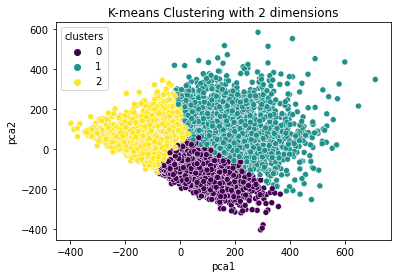

In [75]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(x_imp)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=x_imp['clusters'], data=results, palette='viridis')
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [76]:
x_imp.to_csv('cust_segmets.csv', header=True, index=False)

In [81]:
from IPython.display import display, HTML
from sklearn.tree import _tree, DecisionTreeClassifier
import pandas as pd

def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])

In [135]:
cluster_report(x_imp.drop(['clusters'], axis=1), x_imp['clusters'], min_samples_leaf = 1000, pruning_level=0.05)

,class_name,instance_count,rule_list
1,0,5997,[0.5958866036687048] (Time_at_Address <= 189.5) and (Time_with_Bank <= 192.5) and (Credit_Score > 908.5)[0.8977403293757181] (Time_at_Address <= 189.5) and (Time_with_Bank > 192.5)
2,1,3206,[0.8522088353413655] (Time_at_Address > 189.5)
0,2,7180,[0.9610805047094366] (Time_at_Address <= 189.5) and (Time_with_Bank <= 192.5) and (Credit_Score <= 908.5)


###

In [ ]:
############################SCRATCH#######################################

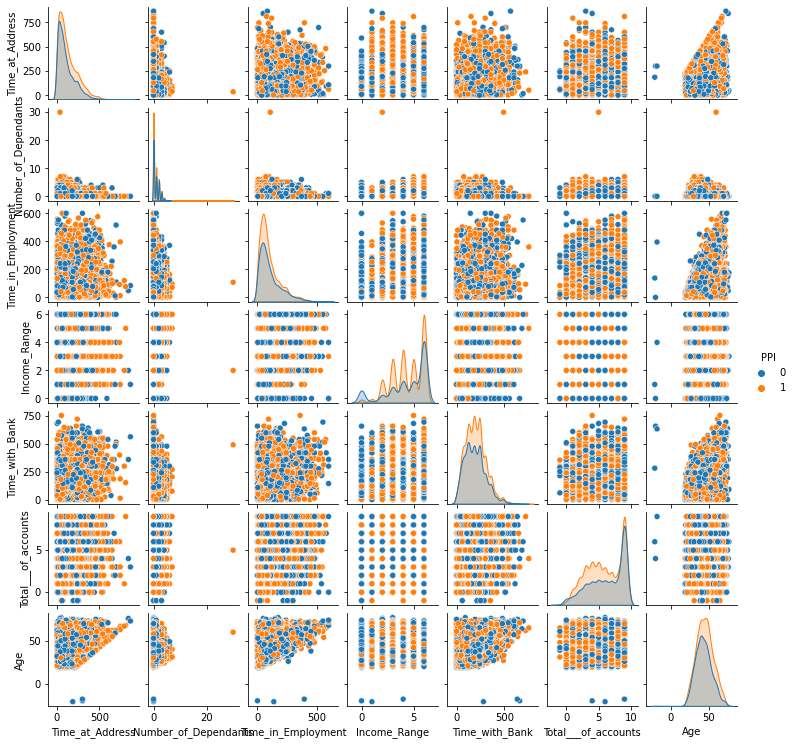

In [105]:
# ploting user attributes to PPI
df_usr = df[[
"Time_at_Address",
"Residential_Status",
"Telephone_Indicator",
"Number_of_Dependants",
"Marital_Status",
"Gender",
"Time_in_Employment",
"Employment_Statu",
"Full_Part_Time_Empl_Ind",
"Perm_Temp_Empl_Ind",
"Income_Range",
"Time_with_Bank",
"Payment_Method",
"Total___of_accounts",
"Age",
"PPI"
]]
sns.pairplot(df_usr, hue = "PPI", height=1.5);

In [129]:
figure, axis = plt.subplots(2, 2)
  
sns.distplot(ax=axis[0, 0], hue = "PPI", df_usr["Residential_Status"])
sns.distplot(ax=axis[0, 1], hue = "PPI", df_usr["Gender"])
sns.distplot(ax=axis[1, 0], hue = "PPI", df_usr["Marital_Status"])
sns.distplot(ax=axis[1, 1], hue = "PPI", df_usr["Payment_Method"])
  
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-129-e9dac7d85a49>, line 3)

In [5]:
features = [
"Credit_Score",
"Final_Grade",
"Term",
"Net_Advance",
"APR",
"Loan_Type",
"Mosaic",
"Mosaic_Class",
"Time_at_Address",
"Residential_Status",
"Telephone_Indicator",
"Number_of_Dependants",
"Marital_Status",
"Gender",
"Time_in_Employment",
"Employment_Status",
"Full_Part_Time_Empl_Ind",
"Perm_Temp_Empl_Ind",
"Income_Range",
"Current_Account",
"ACCESS_Card",
"VISA_Card",
"American_Express",
"Diners_Card",
"Cheque_Guarantee",
"Other_Credit_Store_Card",
"Time_with_Bank",
"Value_of_Property",
"Outstanding_Mortgage_Bal",
"Total_Outstanding_Balances",
"Bureau Data - Monthly_Other_Co_Repayments",
"Worst_History_CT",
"Payment_Method",
"Age",
"Total_outstanding_balance__mortg",
"Total # Public Info. (Court + bankruptcies)",
"Total value Public Info. (Court + bankruptcies)",
"Time since most recent Public Info.  mnths",
"Total_value__CAIS_8_9s",
"Worst_status_L6m",
"Worst_CUrrent_Status",
"__of_status_3_s_L6m",
"Searches___Total___L6m",
"Years_on_ER_for_SP",
"Bankruptcy_Detected__SP_",
"Total___outstanding_CCJ_s",
"Total outstanding balance (excl. mortgages)",
"Total___of_accounts",
"CIFAS_detected",
"Time_since_most_recent_outstandi"
]
X = pd.get_dummies(df[features])
y = df['PPI']

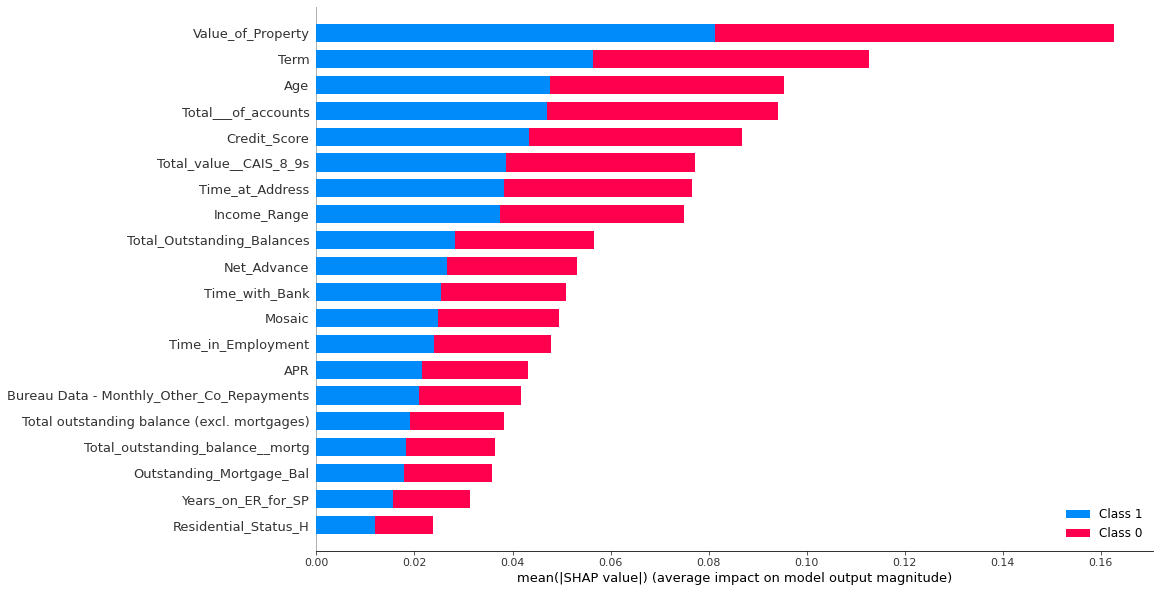

In [286]:
import shap
explainer_km = shap.TreeExplainer(model1)
shap_values_km = explainer_km.shap_values(X)
shap.summary_plot(shap_values_km, X, plot_type="bar", plot_size=(15, 10))

In [224]:
from kmodes.kprototypes import KPrototypes
categorical_features_idx = [2,
6,
10,
11,
13,
14,
16,                            
17,
18,
20,
21,
22,
23,
24,
25,
26,                            
33,
45,
49]

In [225]:
df1 = df.drop(["code","prdt_desc","category","PPI_SINGLE","PPI_JOINT","PPI_LCI","Insurance_Description"], axis=1)
df2 = df.drop(["code","prdt_desc","category","PPI_SINGLE","PPI_JOINT","PPI_LCI","Insurance_Description"], axis=1)

In [275]:
kproto = KPrototypes(n_clusters=2, max_iter=20)
k_model = kproto.fit(df1, categorical=categorical_features_idx)

In [236]:
clusters = kproto.predict(df1, categorical=categorical_features_idx)

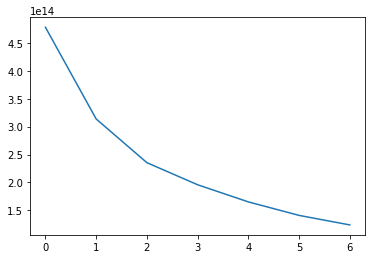

In [228]:
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, max_iter=10)
    kproto.fit_predict(df2, categorical=categorical_features_idx)
    cost.append(kproto.cost_)

plt.plot(cost)